## DATA EXPLORATION WITH PYTHON

write some text here about the data income dataset and what you're trying to do on the dataset

In [1]:
# import package

import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv('adult_income.csv')

df.shape

(32561, 15)

talk about the shape here

In [3]:
# explore the first 5 rows
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df[(df['income'] == '>50K') & (df['hours.per.week'] > 40)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
13,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
16,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K
17,57,Private,317847,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Male,0,2824,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32522,46,Private,364548,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32535,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
32536,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K


### Renaming columns

In [5]:
df = df.rename(columns={
    'fnlwgt': 'final_weight',
    'workclass': 'work_class',
    'education.num': 'education_num',
    'marital.status': 'marital_status',
    'capital.gain': 'capital_gain',
    'capital.loss': 'capital_loss',
    'hours.per.week': 'hours_per_week',
    'native.country': 'native_country',
})

In [6]:
# explore the dataset columns
columns = df.columns

columns

Index(['age', 'work_class', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df['sex'] = (df['sex'] == 'Male').astype(int)

df['sex'].unique()

array([0, 1])

In [9]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [10]:
df['race'] = df['race'].map({
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Other': 3,
    'Amer-Indian-Eskimo': 4
})

df

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,0,0,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,0,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,1,0,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,0,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,0,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,0,1,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,1,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,0,0,40,United-States,<=50K


### Exploring and Analyzing 'income' column

In [11]:
#descriptive statistics summary
df['income'].describe()

count     32561
unique        2
top       <=50K
freq      24720
Name: income, dtype: object

In [12]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [13]:
df['income'].head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [14]:
df['income'] = (df['income'] == '>50K').astype(int)

df['income'].head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [15]:
df['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

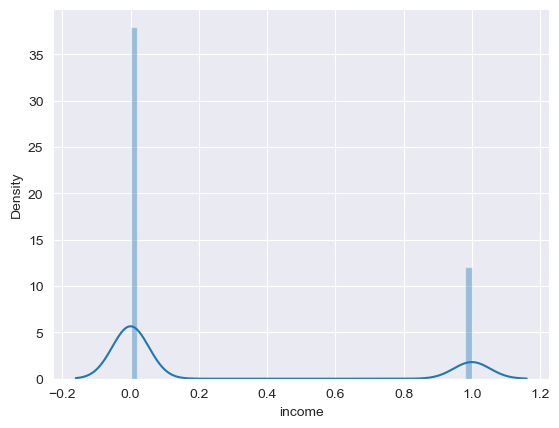

In [16]:
# histogram
sns.distplot(df['income']);

In [17]:
#skewness and kurtosis
print("Skewness: %f" % df['income'].skew())
print("Kurtosis: %f" % df['income'].kurt())

Skewness: 1.212430
Kurtosis: -0.530045


### Data Cleaning
In our dataset, we can see that missing values are present in the form of "?".
the columns: "work_class", "occupation" etc. a being affected

In [18]:
def get_columns_with_null(frame: pd.DataFrame):
    return frame.columns[frame.isnull().any(axis=0)]

In [19]:
df.replace('?', np.NAN, inplace=True)

columns_with_null = get_columns_with_null(df)
print("Columns with null values:", columns_with_null)

df.head()

Columns with null values: Index(['work_class', 'occupation', 'native_country'], dtype='object')


,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,0,0,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,0,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,1,0,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,0,0,3900,40,United-States,0


In [20]:
df.describe()

,age,final_weight,education_num,race,sex,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.222935,0.669205,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,0.633734,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


Data Replacement

In [21]:
# replacing the empty values with the mode 
for col in columns_with_null:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [22]:
# confirming that all data have been filled
columns_with_null = get_columns_with_null(df)
print("Columns with null values:", columns_with_null)

Columns with null values: Index([], dtype='object')


Explore other columns

In [23]:
def get_unique_values_and_values_count(frame: pd.DataFrame) -> None:
    # get all columns and exclude the 'income' column (last element)
    columns = frame.columns.values[::-1]

    for column in columns:
        print(f'Column Name: {column}')
        print('\t', df[column].value_counts())
        print('\t', df[column].unique(), '\n\n')

    print('Columns Count: ', len(columns))


get_unique_values_and_values_count(df)

Column Name: income
	 income
0    24720
1     7841
Name: count, dtype: int64
	 [0 1] 


Column Name: native_country
	 native_country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nic

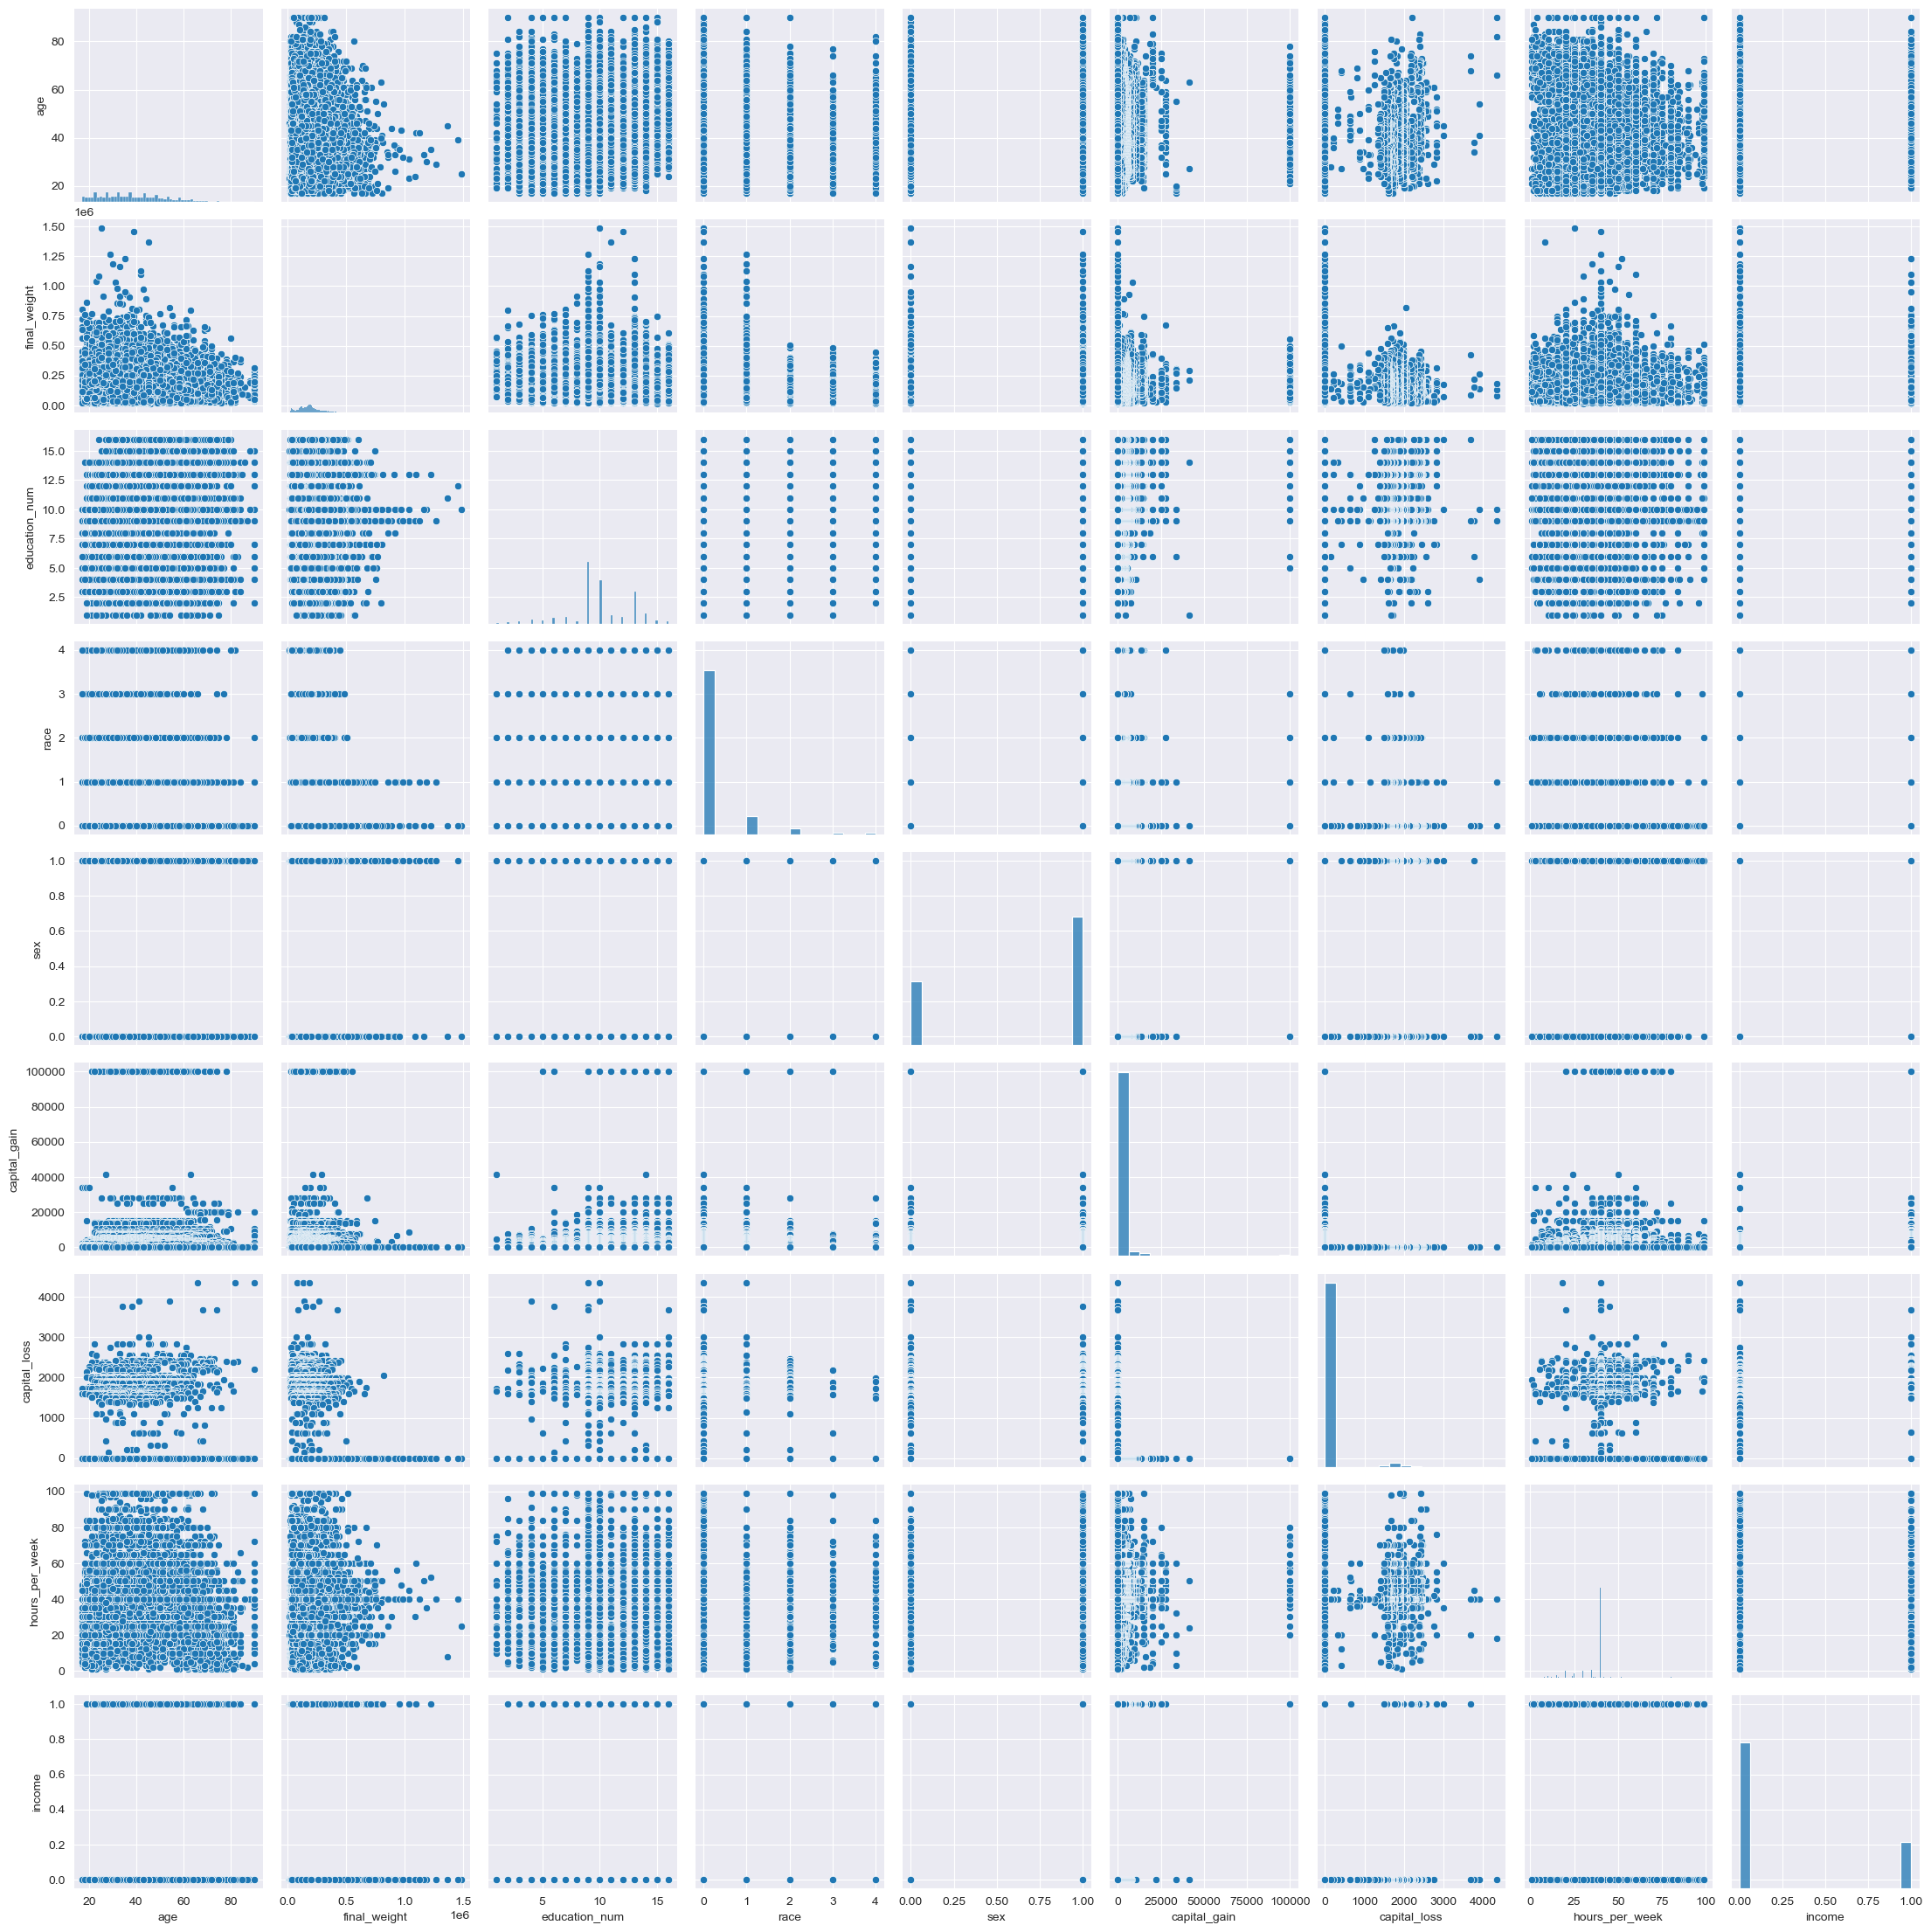

In [24]:
sns.pairplot(df)

### Relationship with numerical variables

In [26]:
# get all the numerical columns in dataframe
numeric_columns = df.select_dtypes(include='number').columns

print(numeric_columns)

Index(['age', 'final_weight', 'education_num', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'income'],
      dtype='object')


In [27]:
# a function to create a scatter plot with income against input column 
def numeric_plot_income_distribution(frame: pd.DataFrame, column: str):
    # Set index if it's not already set
    frame.reset_index(drop=True, inplace=True)

    columns = [column, 'income']

    scaler = StandardScaler()
    frame_scaled = pd.DataFrame(scaler.fit_transform(frame[columns]), columns=columns)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=frame_scaled, y=column, x='income')
    sns.regplot(data=frame_scaled, y=column, x='income', scatter=False, color='red')


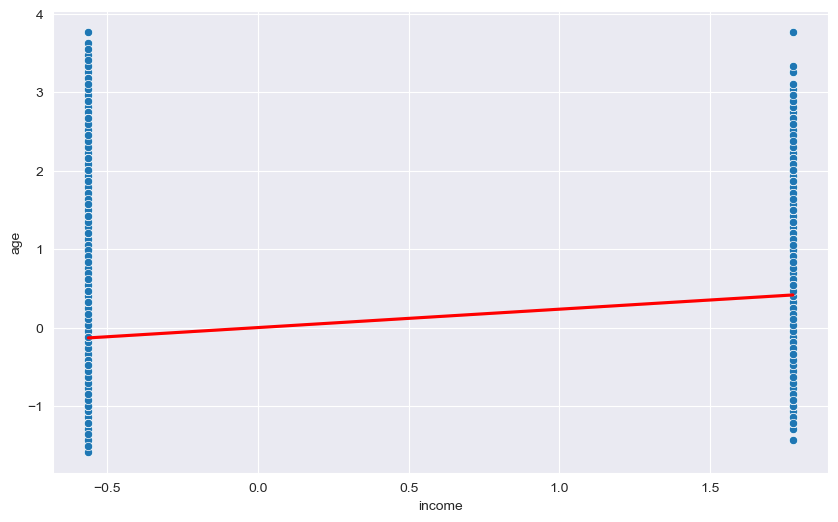

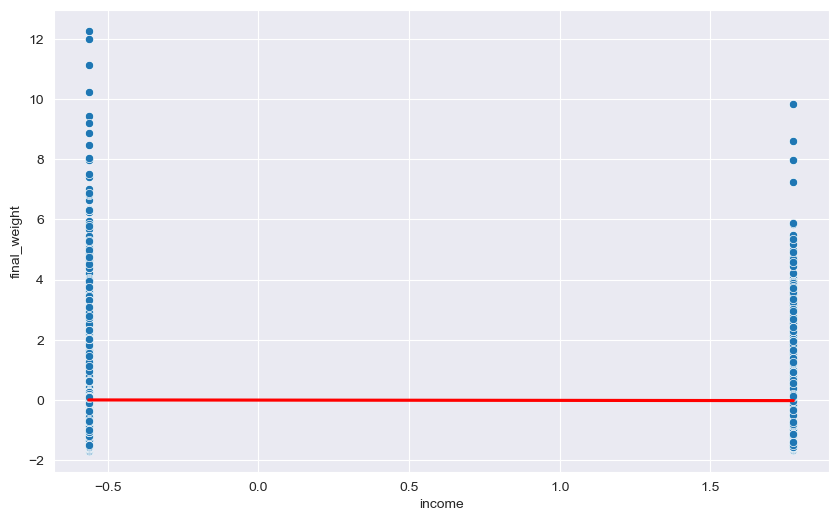

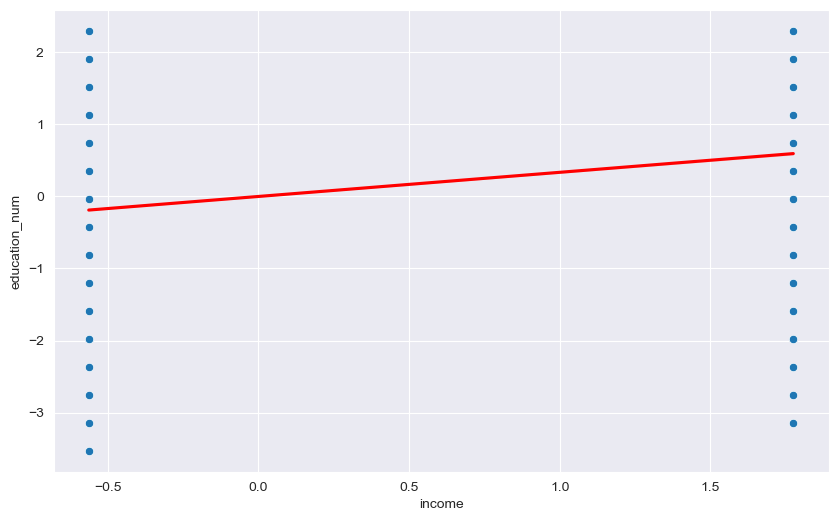

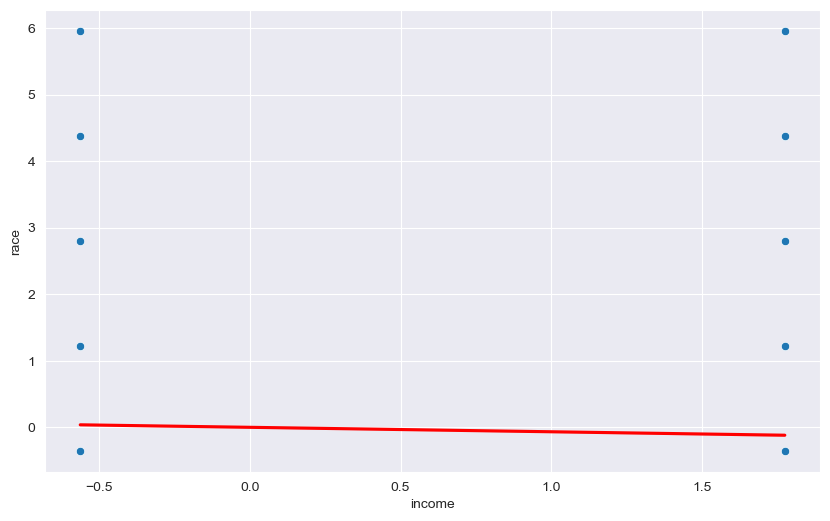

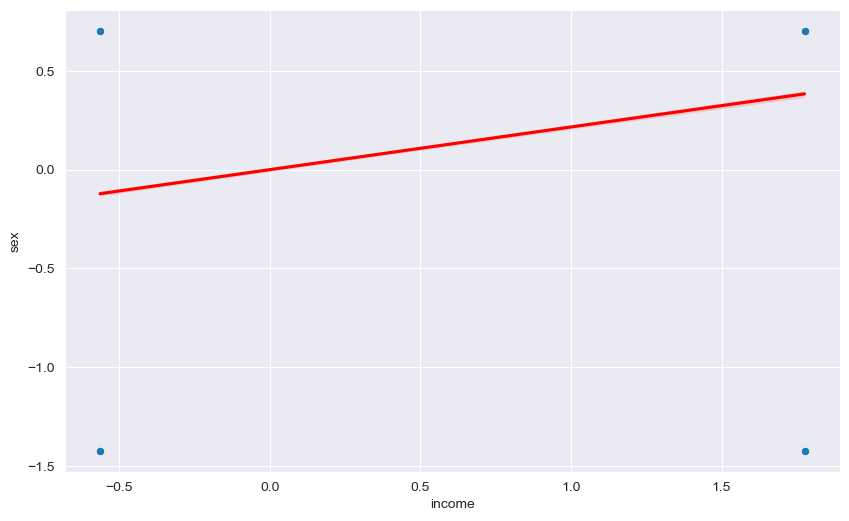

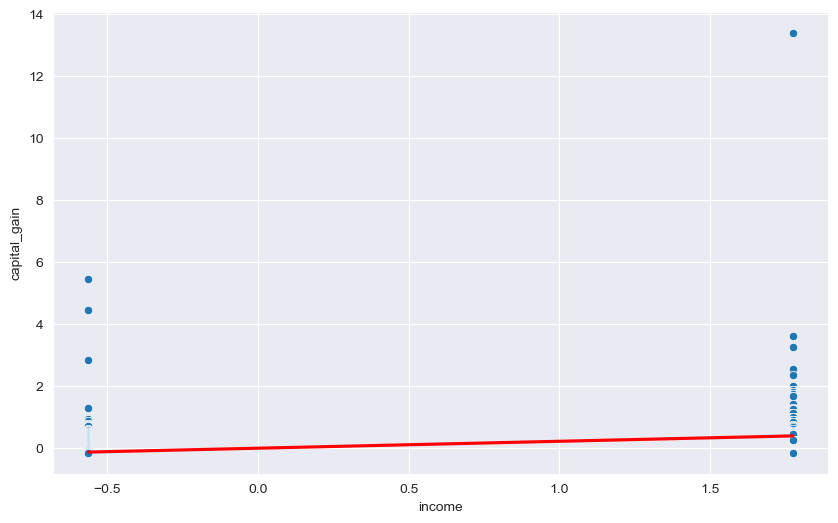

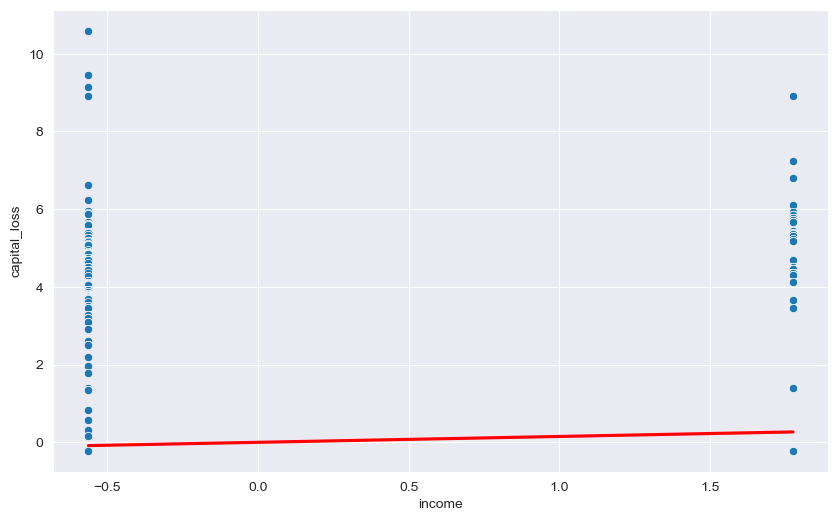

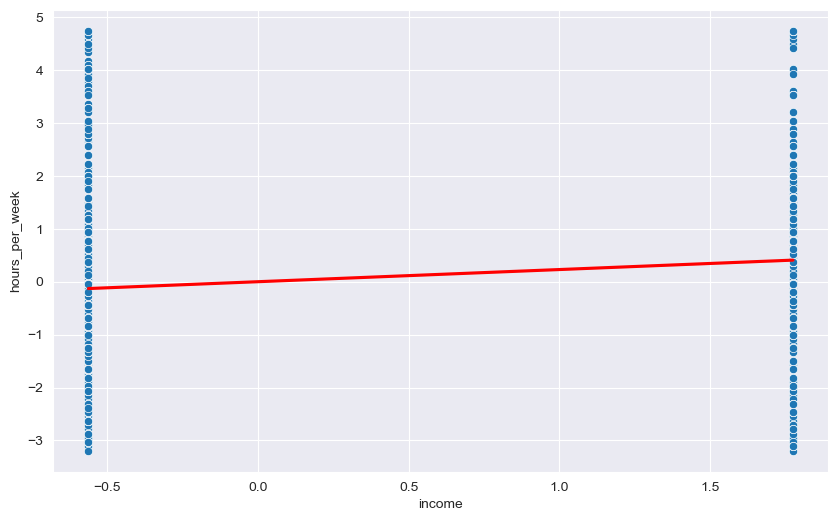

In [28]:
for column in numeric_columns:
    if column == 'income':
        continue
    numeric_plot_income_distribution(df, column)

### Relationship with categorical features

In [29]:
# get categorical columns
columns_set = set(columns)
numeric_columns_set = set(numeric_columns)

categorical_columns = list(columns_set - numeric_columns_set)
categorical_columns

['marital_status',
 'relationship',
 'work_class',
 'education',
 'occupation',
 'native_country']

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


# a function to create a scatter plot with income against input column 
def categorical_plot_income_distribution(frame: pd.DataFrame, column: str):
    numeric_column = 'income'
    categorical_column = column

    # Define preprocessing steps for numeric and categorical columns
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False))  # Setting sparse=False to get dense array
    ])

    # Combine preprocessing steps for both types of columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, [numeric_column]),
            ('cat', categorical_transformer, [categorical_column])
        ])

    # Example: Applying fit_transform on both columns
    transformed_data = preprocessor.fit_transform(df[[numeric_column, categorical_column]])

    # Check dimensions and column names
    print("Transformed Data Shape:", transformed_data.shape)
    numeric_scaled_column_name = f"{numeric_column}_scaled"
    categorical_encoded_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out([categorical_column])
    column_names = [numeric_scaled_column_name] + list(categorical_encoded_columns)
    print("Column Names:", column_names)

    # Create DataFrame from transformed data
    transformed_df = pd.DataFrame(transformed_data, columns=column_names)

    # Plot box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=transformed_df)
    plt.xlabel("Features")
    plt.ylabel("Transformed Values")
    plt.title("Box Plot of Transformed Data")
    plt.show()


Transformed Data Shape: (32561, 8)
Column Names: ['income_scaled', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed']


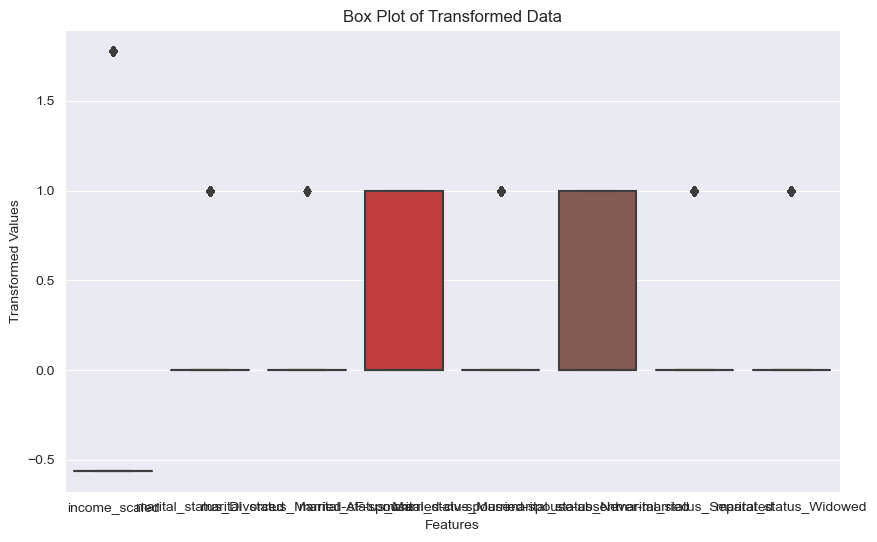

Transformed Data Shape: (32561, 7)
Column Names: ['income_scaled', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife']


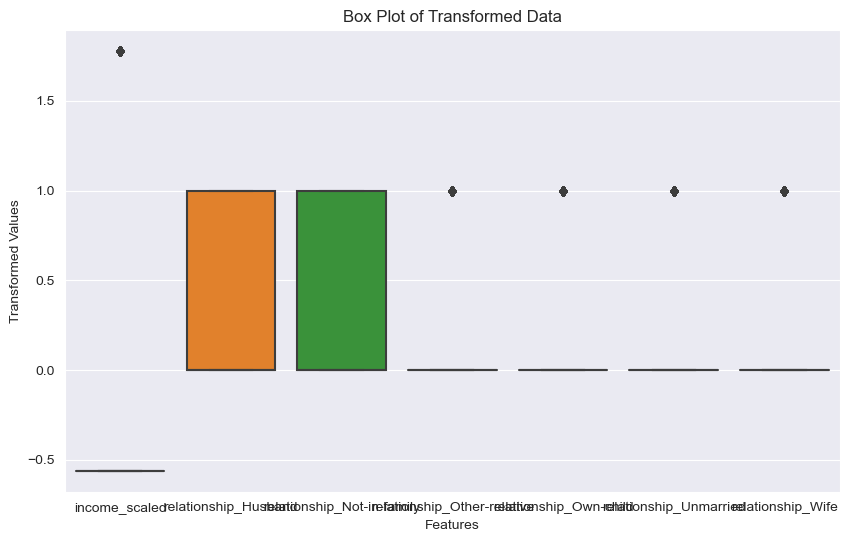

Transformed Data Shape: (32561, 9)
Column Names: ['income_scaled', 'work_class_Federal-gov', 'work_class_Local-gov', 'work_class_Never-worked', 'work_class_Private', 'work_class_Self-emp-inc', 'work_class_Self-emp-not-inc', 'work_class_State-gov', 'work_class_Without-pay']


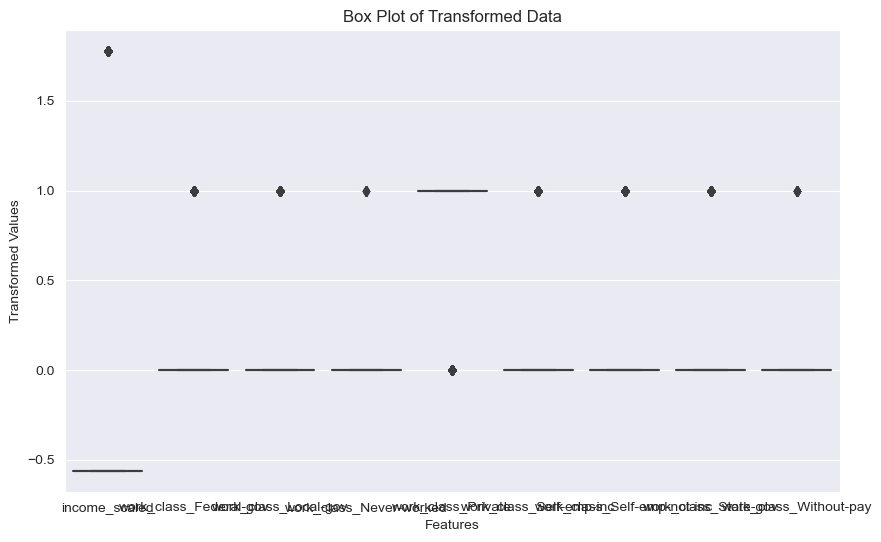

Transformed Data Shape: (32561, 17)
Column Names: ['income_scaled', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college']


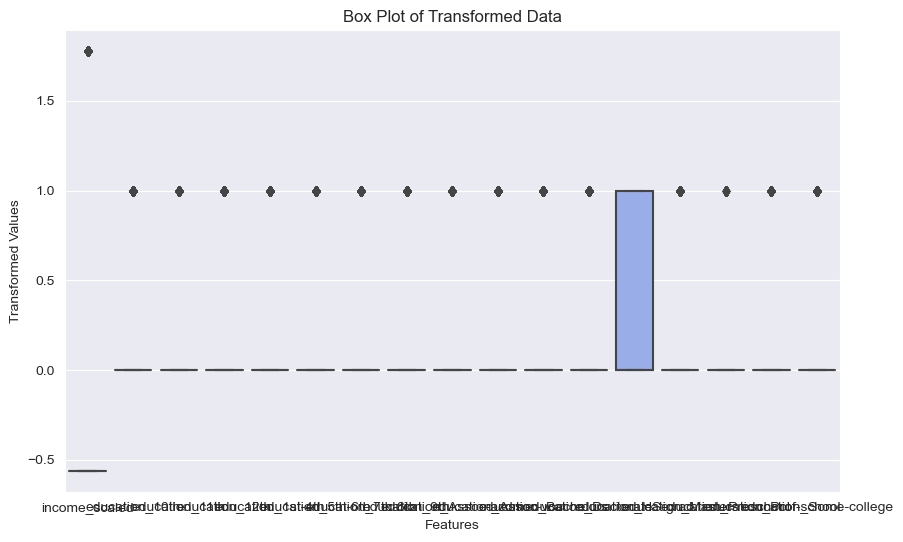

Transformed Data Shape: (32561, 15)
Column Names: ['income_scaled', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving']


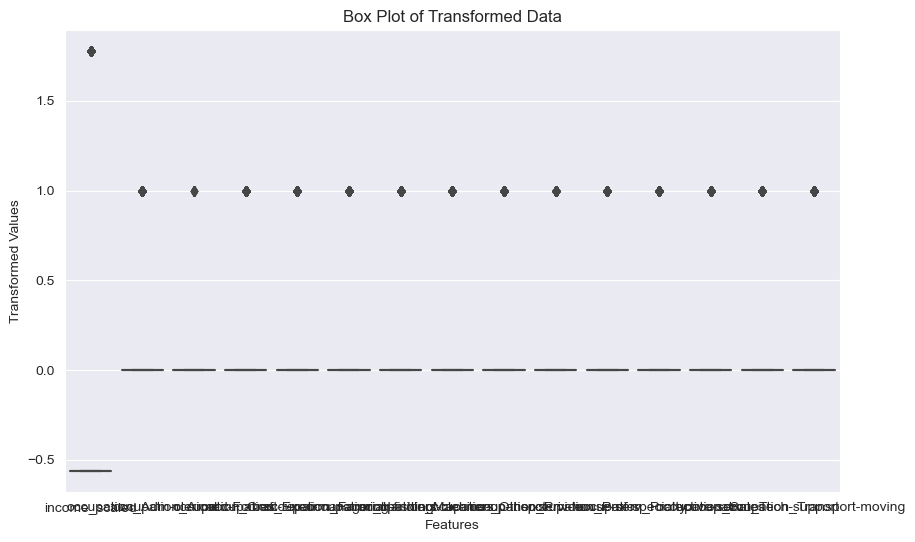

Transformed Data Shape: (32561, 42)
Column Names: ['income_scaled', 'native_country_Cambodia', 'native_country_Canada', 'native_country_China', 'native_country_Columbia', 'native_country_Cuba', 'native_country_Dominican-Republic', 'native_country_Ecuador', 'native_country_El-Salvador', 'native_country_England', 'native_country_France', 'native_country_Germany', 'native_country_Greece', 'native_country_Guatemala', 'native_country_Haiti', 'native_country_Holand-Netherlands', 'native_country_Honduras', 'native_country_Hong', 'native_country_Hungary', 'native_country_India', 'native_country_Iran', 'native_country_Ireland', 'native_country_Italy', 'native_country_Jamaica', 'native_country_Japan', 'native_country_Laos', 'native_country_Mexico', 'native_country_Nicaragua', 'native_country_Outlying-US(Guam-USVI-etc)', 'native_country_Peru', 'native_country_Philippines', 'native_country_Poland', 'native_country_Portugal', 'native_country_Puerto-Rico', 'native_country_Scotland', 'native_country_

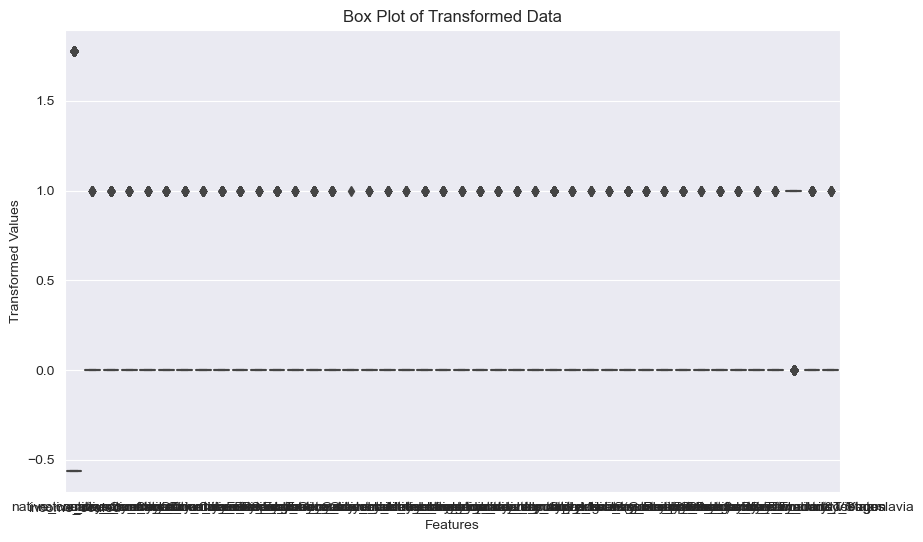

In [31]:
for column in categorical_columns:
    categorical_plot_income_distribution(df, column)

Age Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

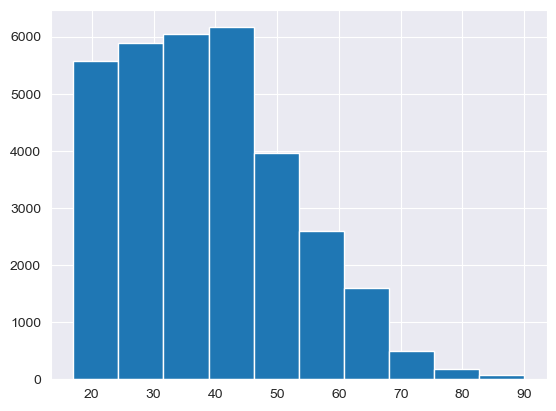

In [32]:
df['age'].hist()
plt.show

By observation age attribute is right-skewed and not symmetric
min and max age in btw 17 to 90.

final wieght Distribution:

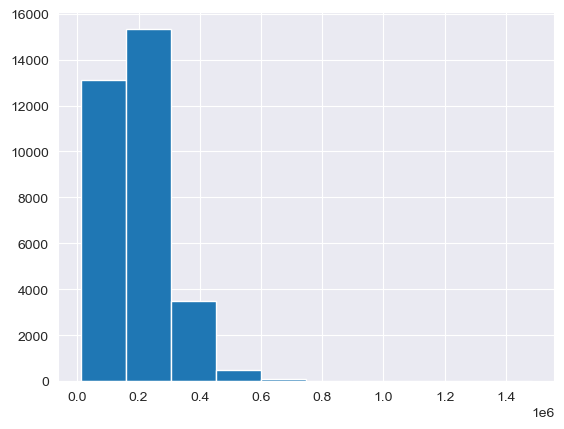

In [33]:
df['final_weight'].hist()
plt.show()

It seems like Rightly skewed.

capital-gain Distribution

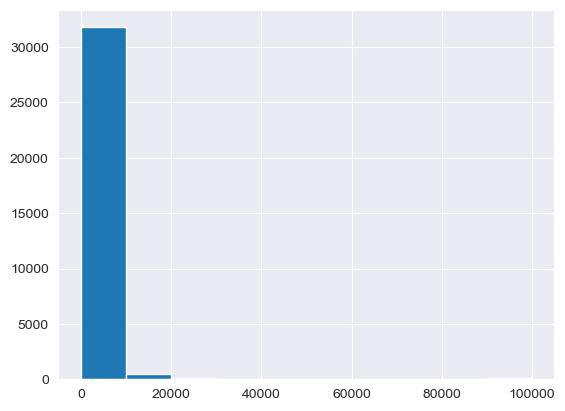

In [34]:
df['capital_gain'].hist()
plt.show()

capital gain shows that either a person has gain or no gain of very large amount(10k or 99k).

capital loss distribution

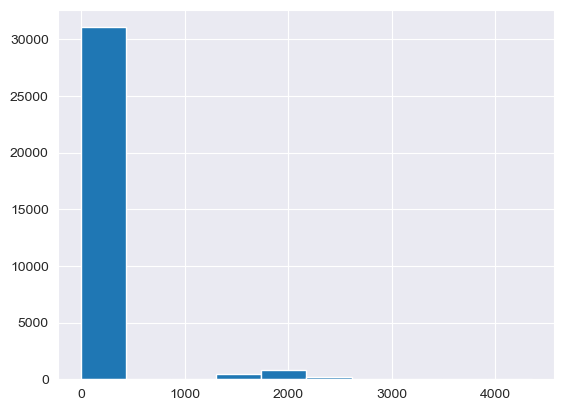

In [35]:
df['capital_loss'].hist()
plt.show()

This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2282).
This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 43000 of them)

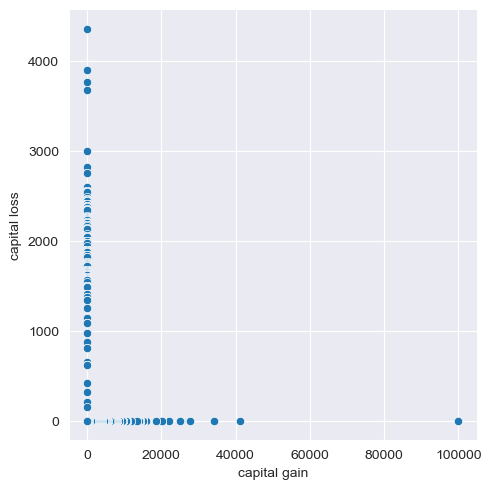

In [36]:
sns.relplot(x='capital_gain', y='capital_loss', data=df)
plt.xlabel('capital gain')
plt.ylabel('capital loss')
plt.show()

1.both capital-gain and capital-loss can be zero(0)
2.if capital_gain is Zero then capital_loss being high or above zero.
3.if capital_loss is Zero then capital_gain being high or above zero.

In [37]:
df.head()


,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,0,0,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,0,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,1,0,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,0,0,3900,40,United-States,0


Hours per week distribution

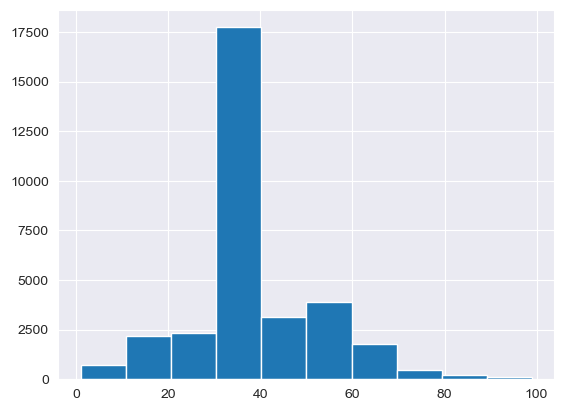

In [38]:
df['hours_per_week'].hist()
plt.show()

In this data the hours per week attribute varies within the range of 1 to 99.
By observation,30-40 hrs people work per week,around 27000 people.
There are also few people who work 80-100 hours per week and some less than 20 which is unusual.

In [39]:
from typing import Optional


def explore_column_distribution(frame: pd.DataFrame, column: str, total_records: float,
                                hue: Optional[str] = None) -> None:
    plt.figure(figsize=(20, 5))

    if hue is None:
        ax = sns.countplot(x=column, data=frame)
    else:
        ax = sns.countplot(x=column, data=frame, hue=hue)

    for bar in ax.patches:
        bar_height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.,
                bar_height + 3,
                '{:1.2f}%'.format((bar_height / total_records) * 100),
                ha="center")

    plt.show()

work_class distribution

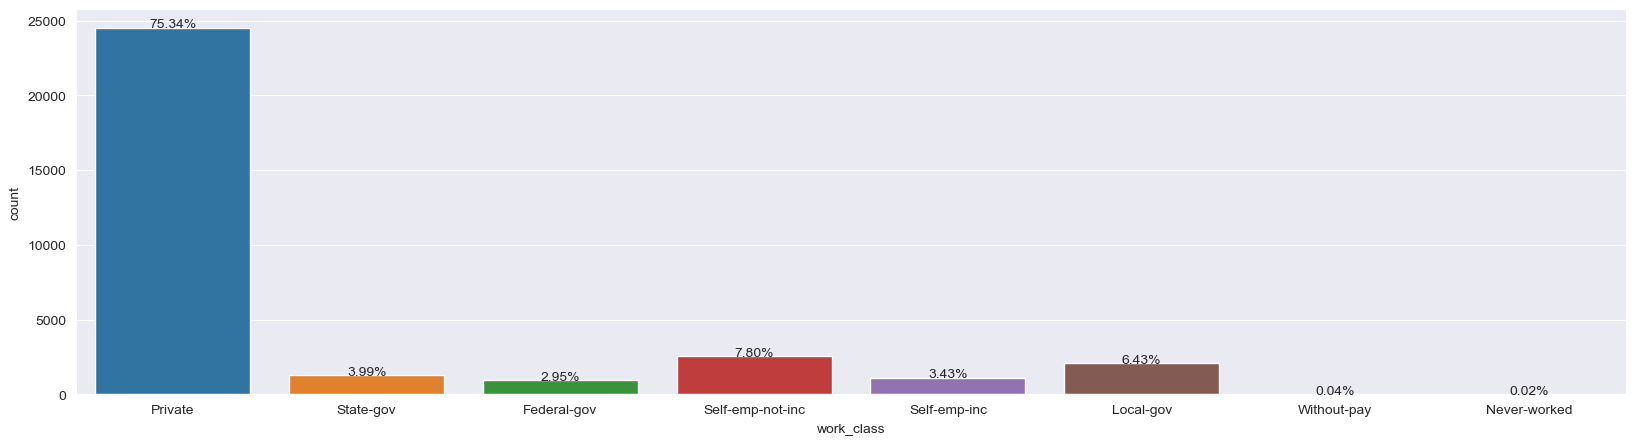

In [40]:
explore_column_distribution(df, column='work_class', total_records=float(len(df['income'])))

most of them belong to private workclass that is around 75%.
without-play and never-play workclass has min count

Educational distribution

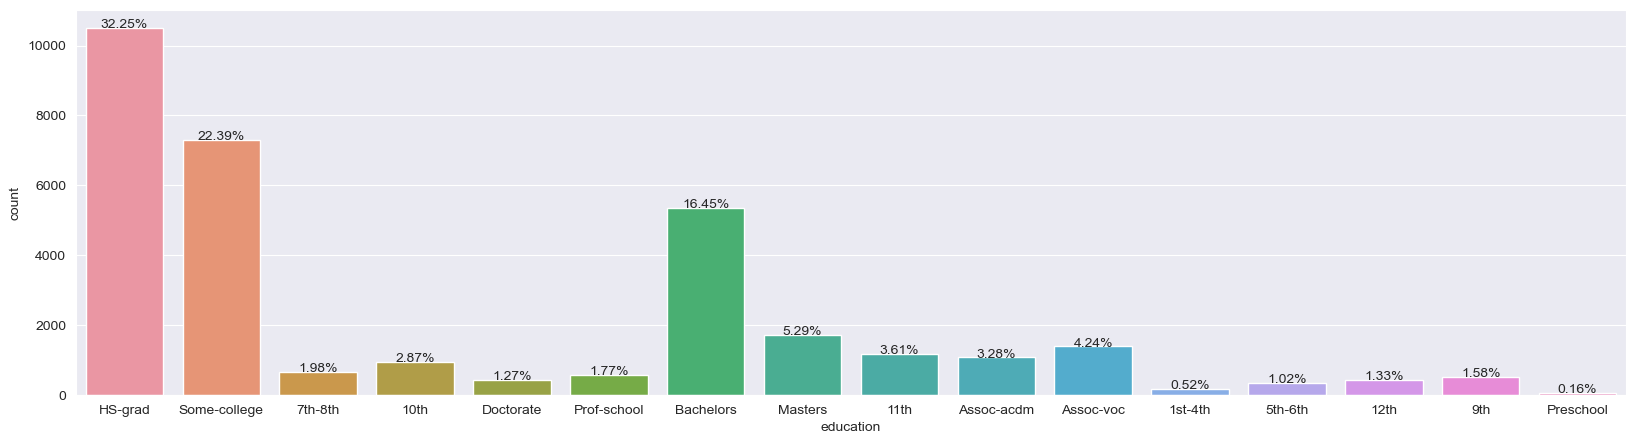

In [41]:
explore_column_distribution(df, column='education', total_records=float(len(df['income'])))

Hs-grad has 32.32% of all the education attribute.
pre-school has min.

Marital status distribution

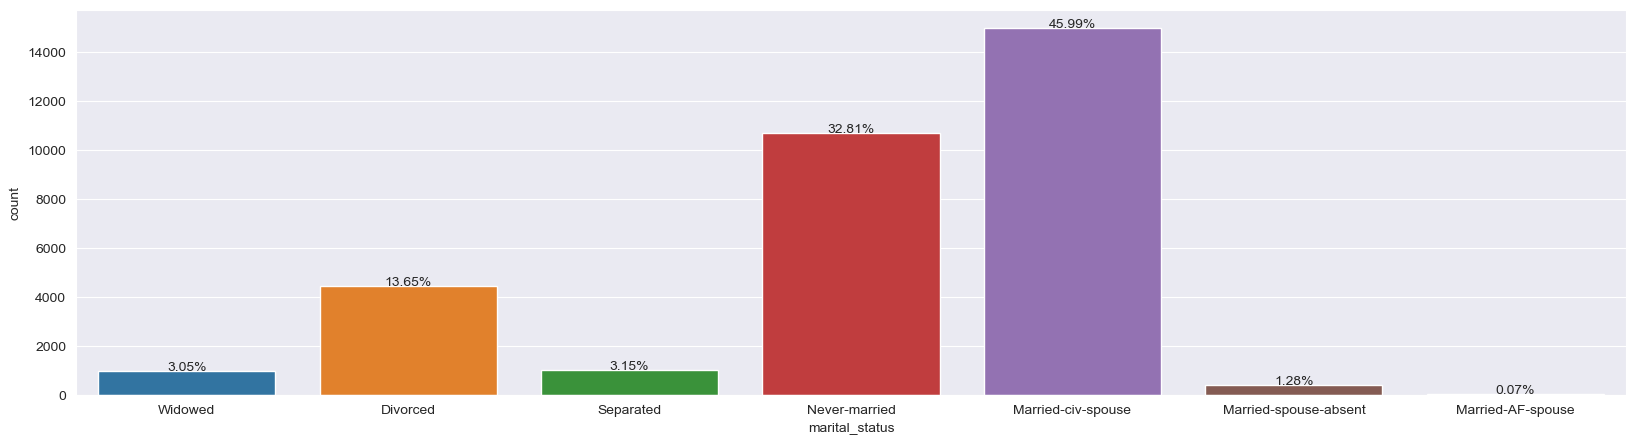

In [42]:
explore_column_distribution(df, column='marital_status', total_records=float(len(df)))

Married-civ-spouse has maximum number of samples.
Married-AF-spouse has minimum number of obs.

Occupational distribution

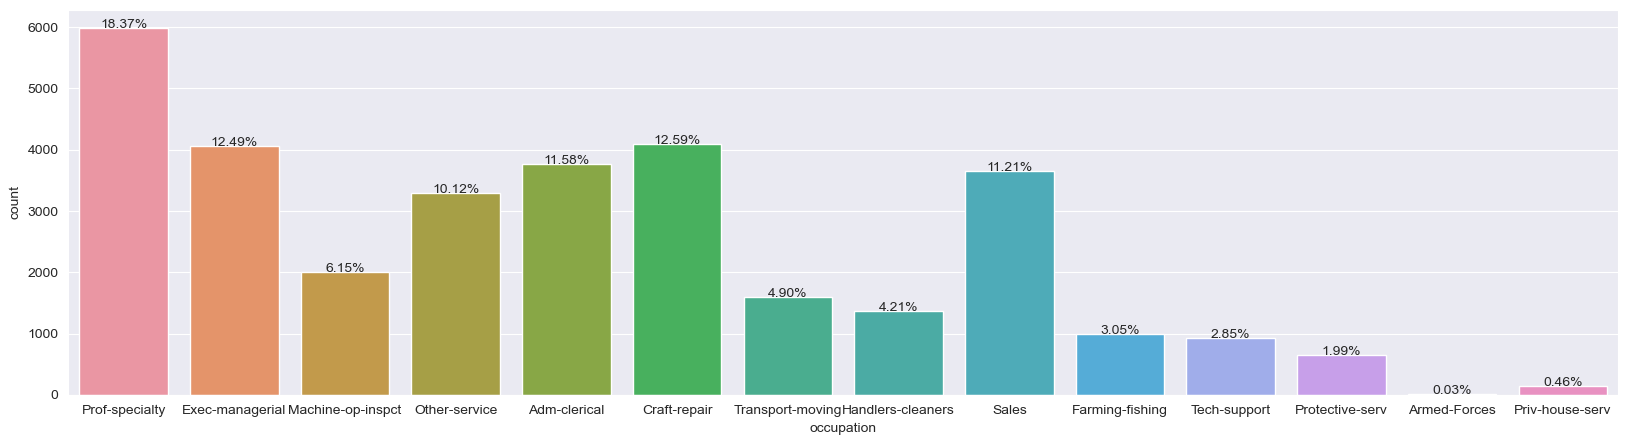

In [43]:
explore_column_distribution(df, column='occupation', total_records=float(len(df)))

Prof-specialty has the maximum count.
Armed-Forces has minimum samples in the occupation attribute.

Relationship Distribution

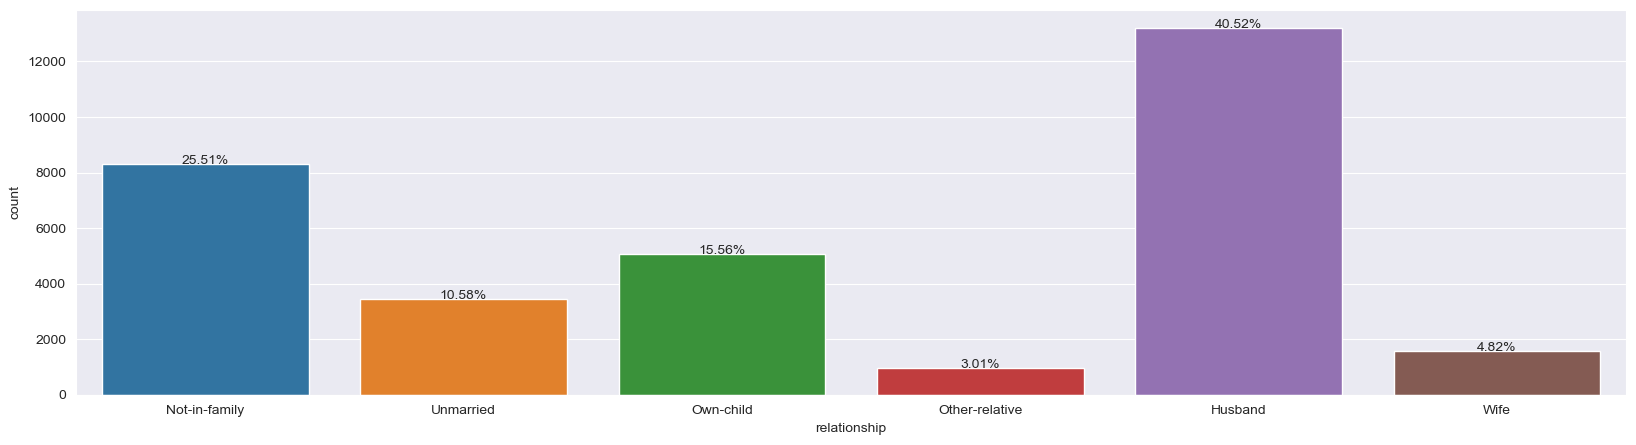

In [44]:
explore_column_distribution(df, column='relationship', total_records=float(len(df)))

Husband has maximum percentage among all.

Race distribution

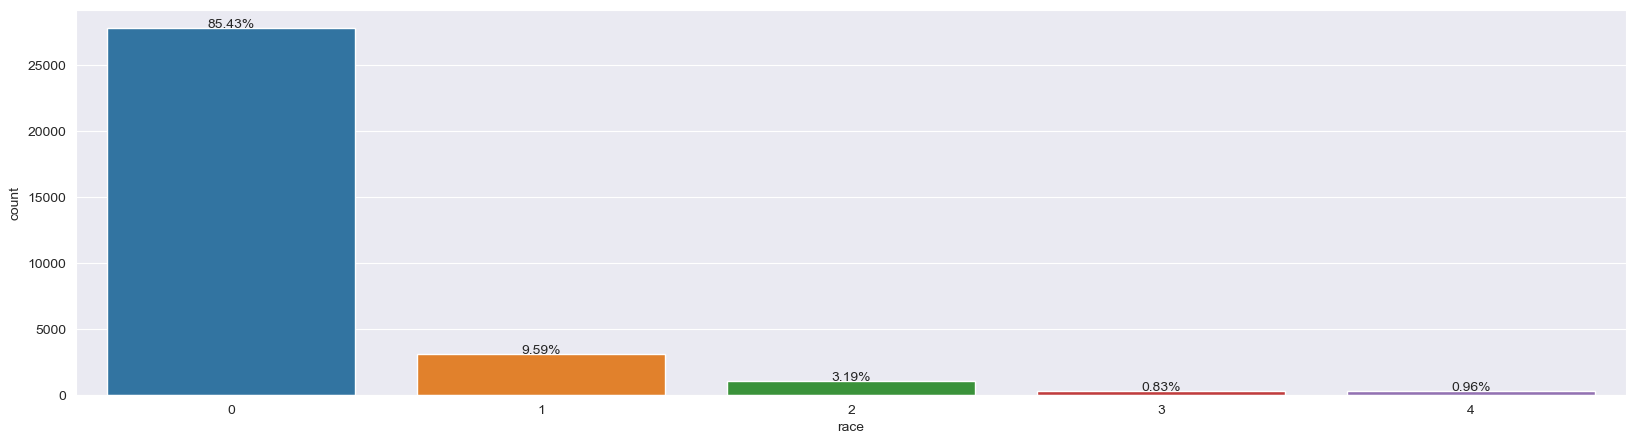

In [45]:
explore_column_distribution(df, column='race', total_records=float(len(df)))

white is maximun among all about 85.50%.
black is second maximun.

Sex(gender) distribution

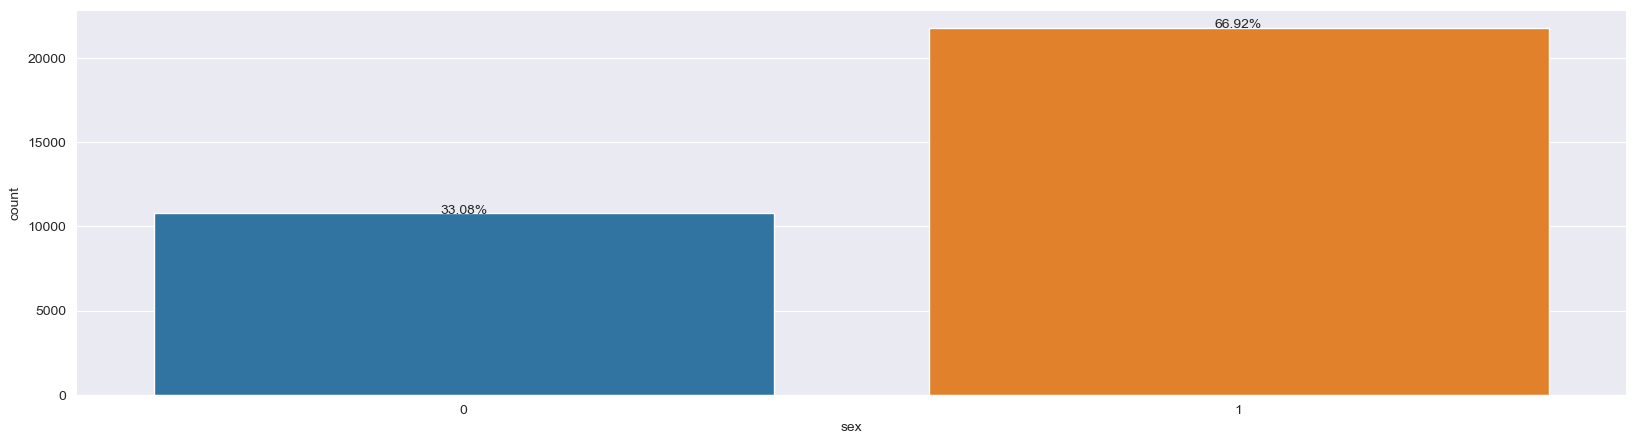

In [46]:
explore_column_distribution(df, column='sex', total_records=float(len(df)))

there are 2 unique categories in gender.
frequency of male is higher than female.

Income Distribution

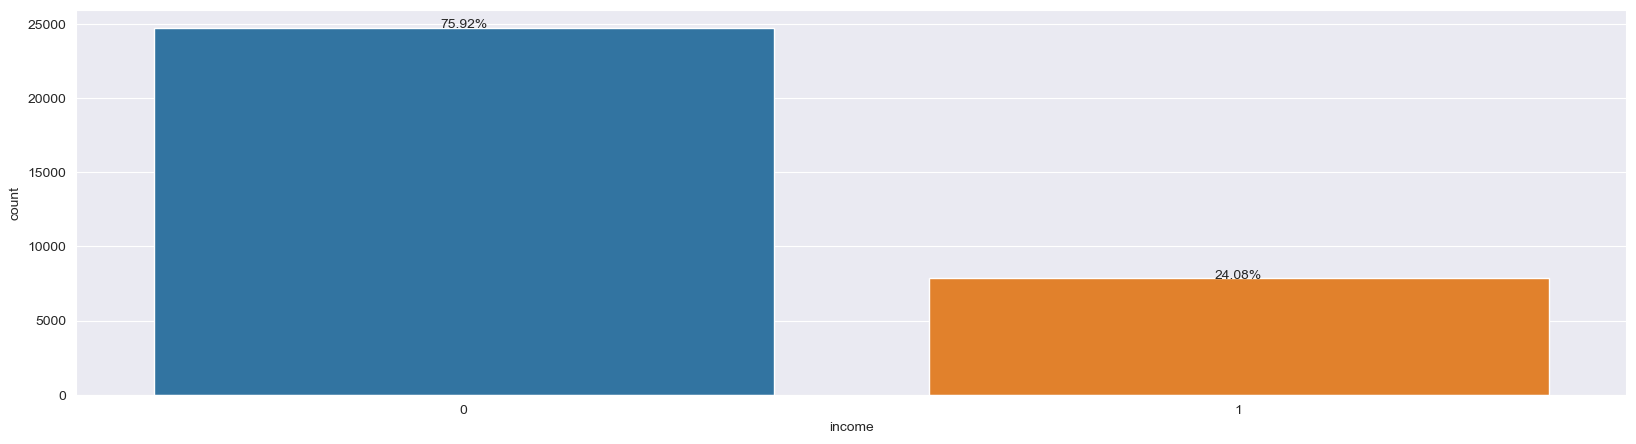

In [47]:
explore_column_distribution(df, column='income', total_records=float(len(df)))

In income there is 2 group, 
group1 = 1(who earns more than 50k) 24.08% belong to income 
group2 = 0(who earns less than 50k) 75.92% belong to income

Exploring other columns with target column (bi-variate analysis)

In [48]:
def bi_variate_box_plot_exploration(frame: pd.DataFrame, x: str, y: str) -> None:
    title = f'{x.title()} vs {y.title()}'
    plt.figure(figsize=(20, 8))
    sns.boxplot(x=x, y=y, data=frame).set_title(title)
    plt.show()


def bi_variate_count_plot_exploration(frame: pd.DataFrame, x: str, y: str) -> None:
    title = f'{x.title()} vs {y.title()}'
    plt.figure(figsize=(20, 7))
    sns.countplot(x=x, hue=y, data=frame).set_title(title)
    plt.show()

Age vs Income

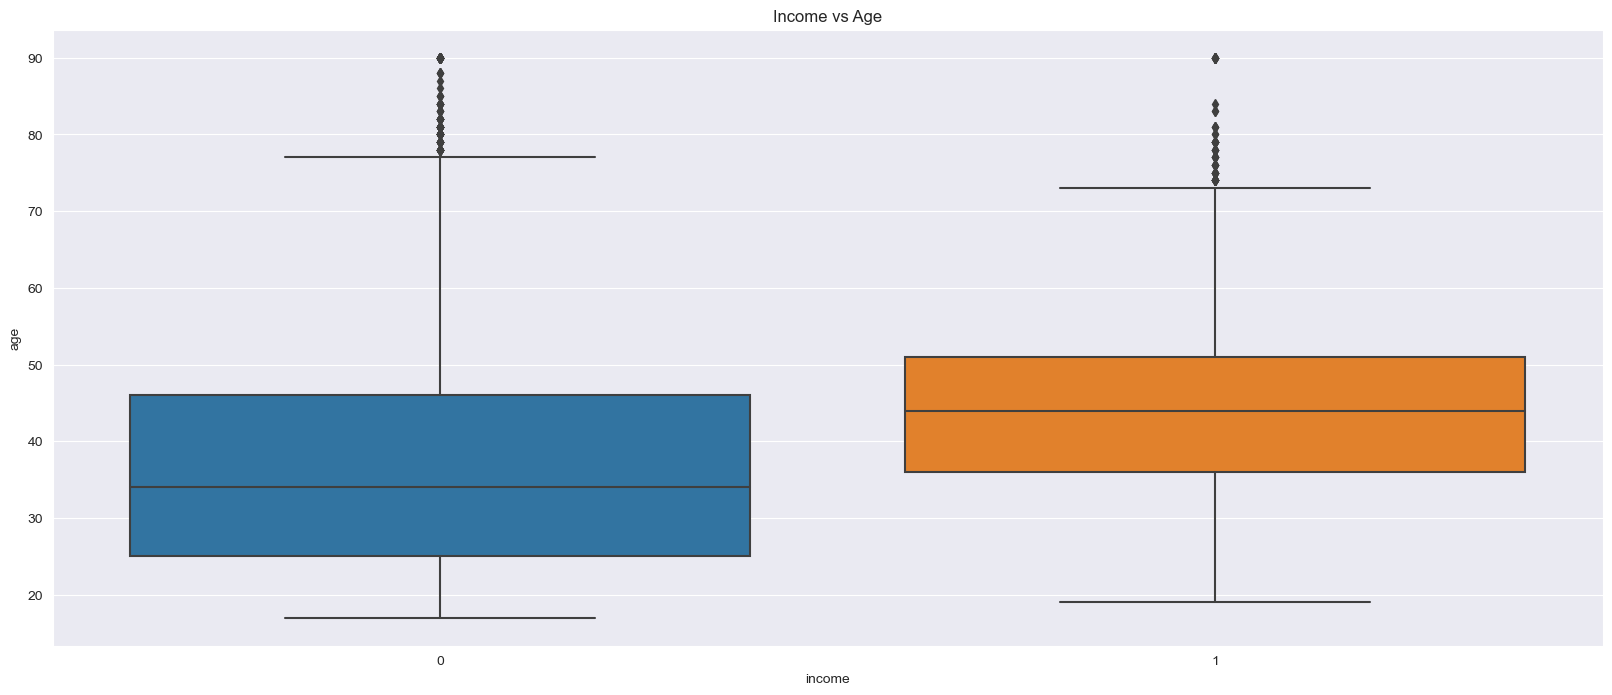

In [49]:
bi_variate_box_plot_exploration(frame=df, x='income', y='age')

Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).

Work_class vs Income

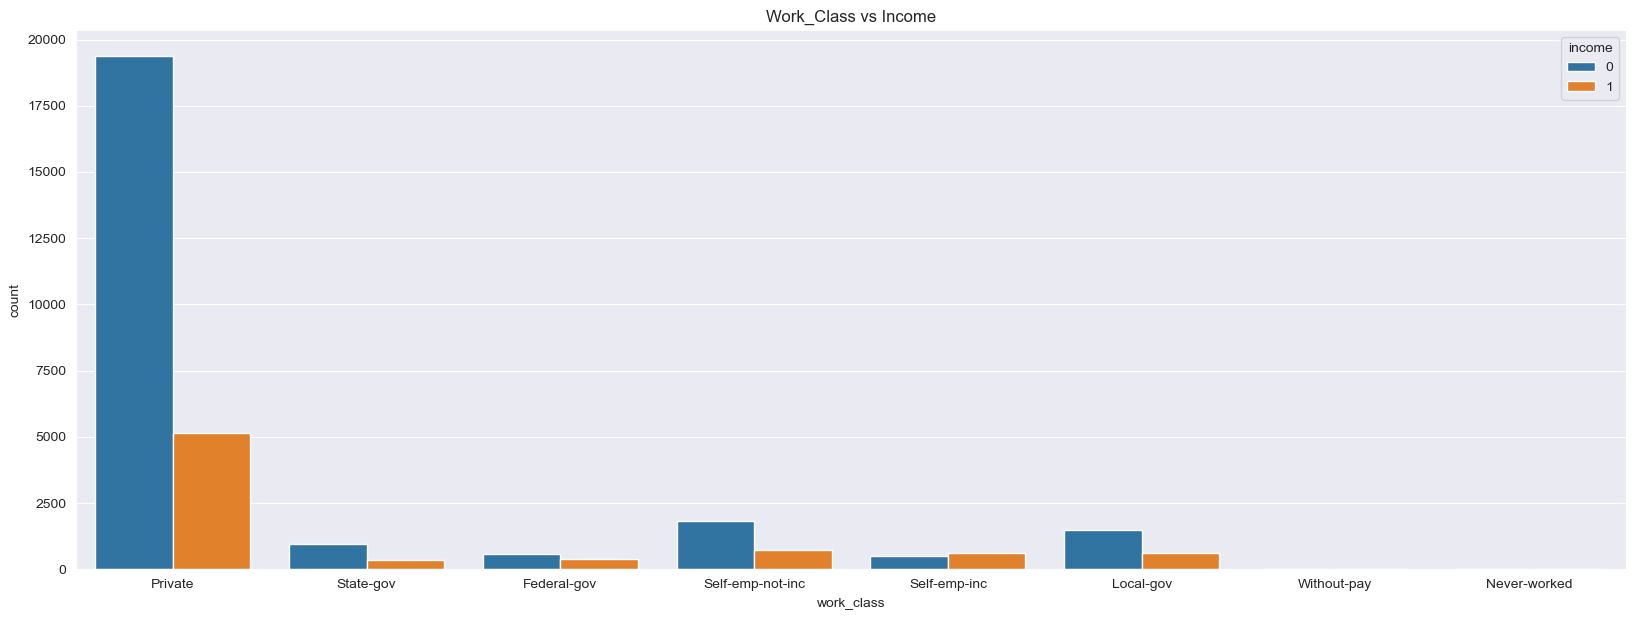

In [50]:
bi_variate_count_plot_exploration(frame=df, x='work_class', y='income')

The data seems to mainly consist private employees.
In All the workclasses number of people earning less then 50k are more then those earning 50k.

Capital gain vs Income

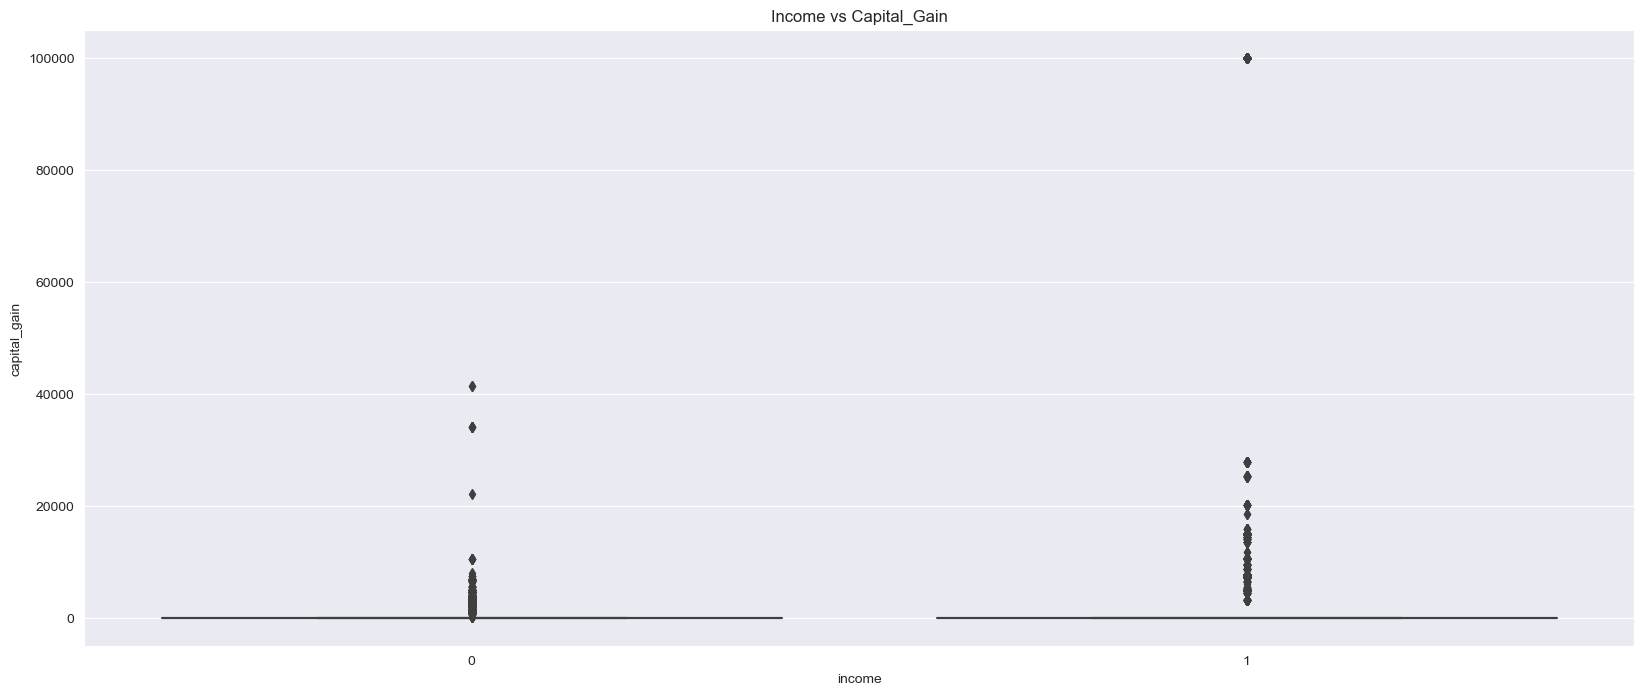

In [51]:
bi_variate_box_plot_exploration(frame=df, x='income', y='capital_gain')

Most of the capital gains value is accumulated at 0 for both the income group .

Capital loss vs Income

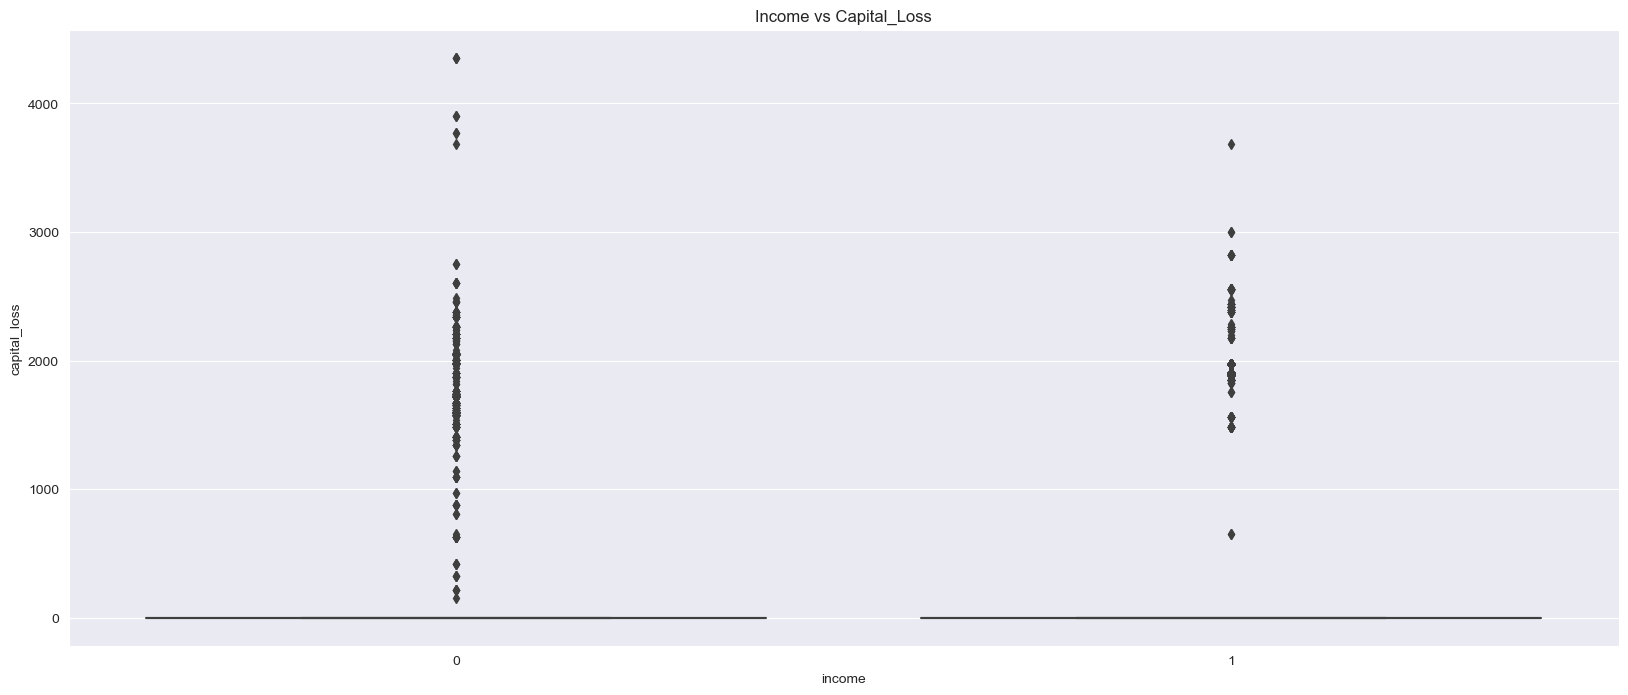

In [52]:
bi_variate_box_plot_exploration(frame=df, x='income', y='capital_loss')

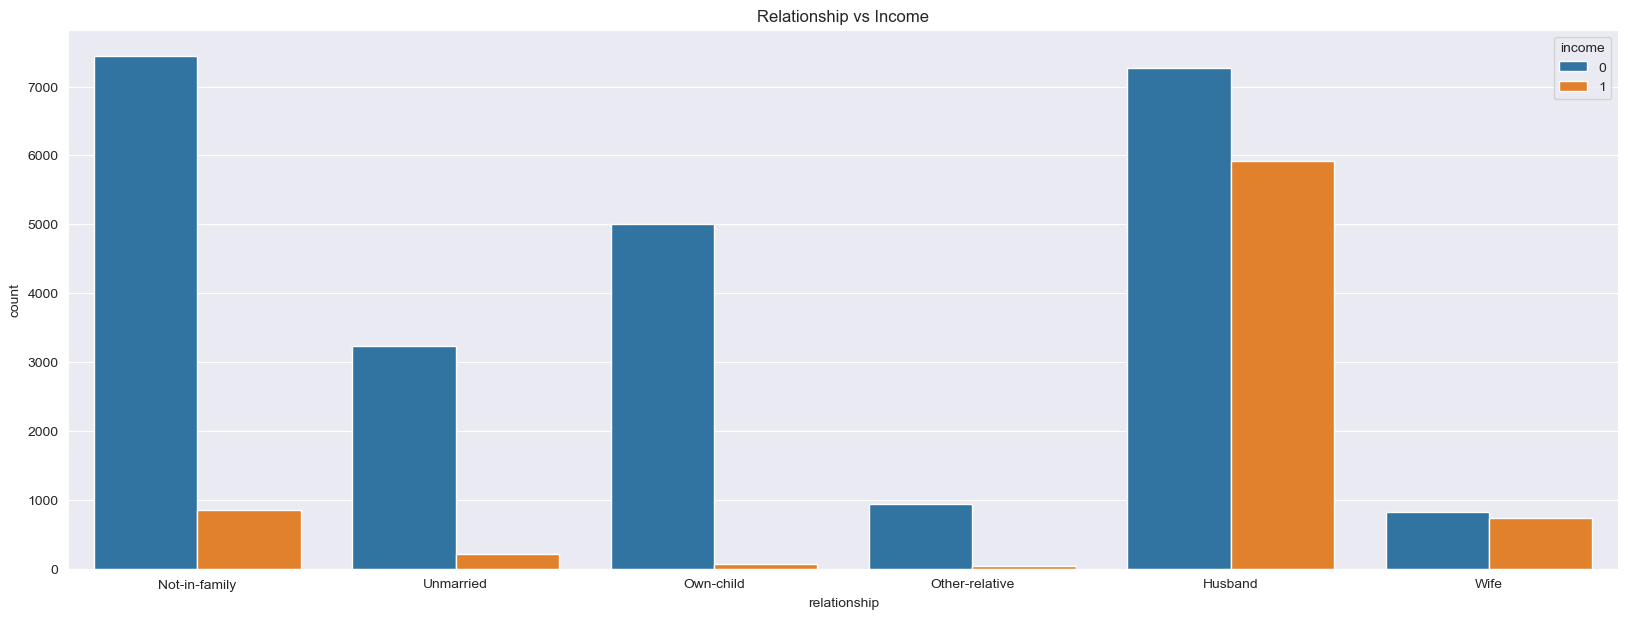

In [53]:
bi_variate_count_plot_exploration(frame=df, x='relationship', y='income')

Mostly a person with relation as husband in a family has most count of people with more than 50k income

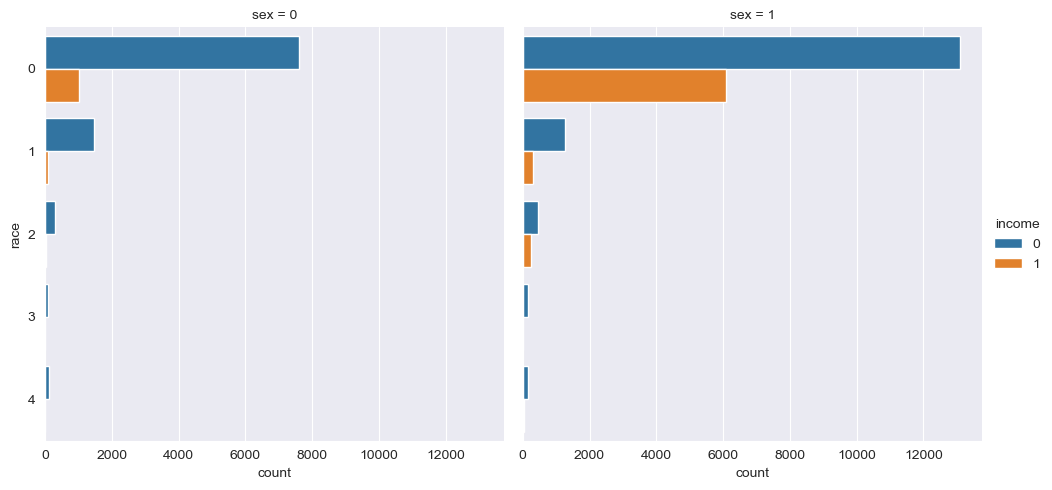

In [54]:
sns.catplot(y="race", hue="income", kind="count", col="sex", data=df);

It is clear people with Gender male and race as white has the most people with income more than 50k.

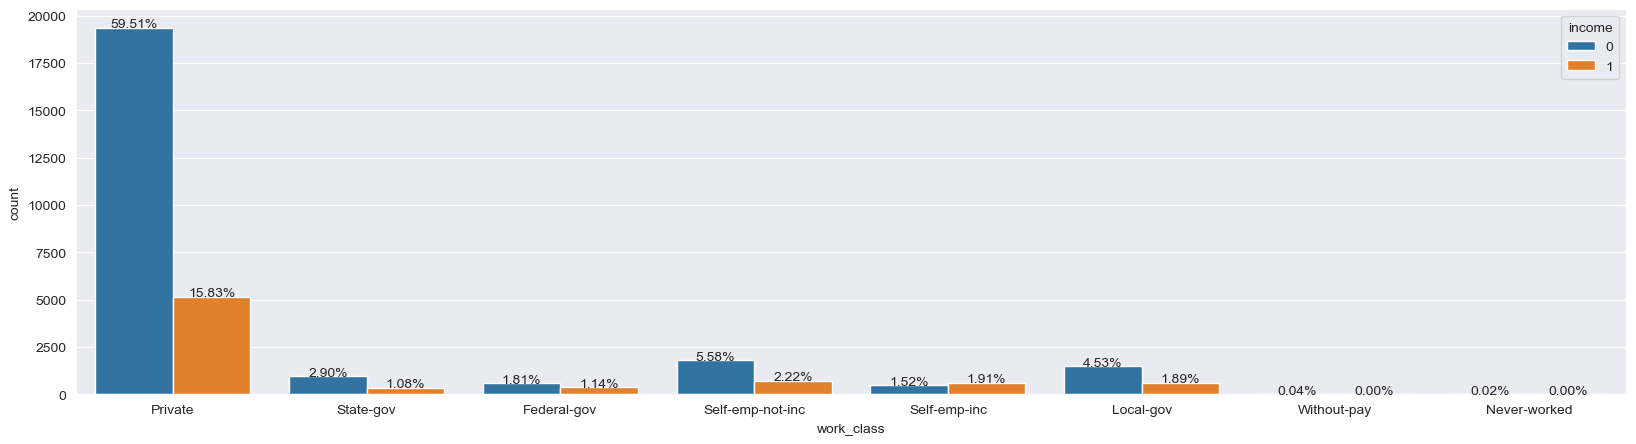

In [55]:
explore_column_distribution(df, column='work_class', hue='income', total_records=float(len(df['income'])))

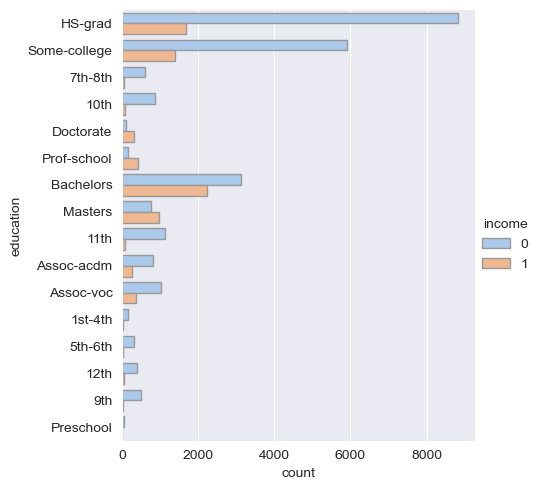

In [56]:
sns.catplot(y="education", hue="income", kind="count", palette="pastel", edgecolor=".6", data=df);

This data mostly consist of people who has education as hs-grad

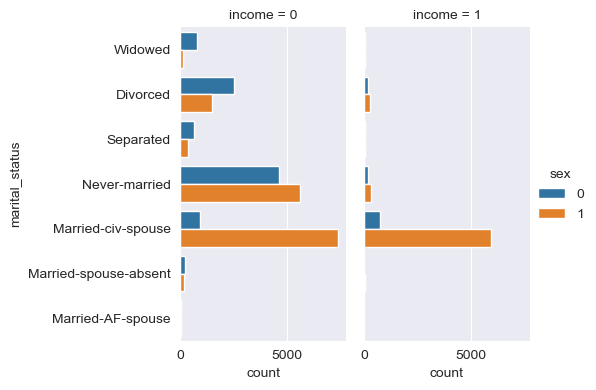

In [57]:
sns.catplot(y='marital_status', hue='sex', col='income', data=df, kind='count', height=4, aspect=.7)

The people with marital status as Married-civ-spouse has the highest people with income more then 50k.

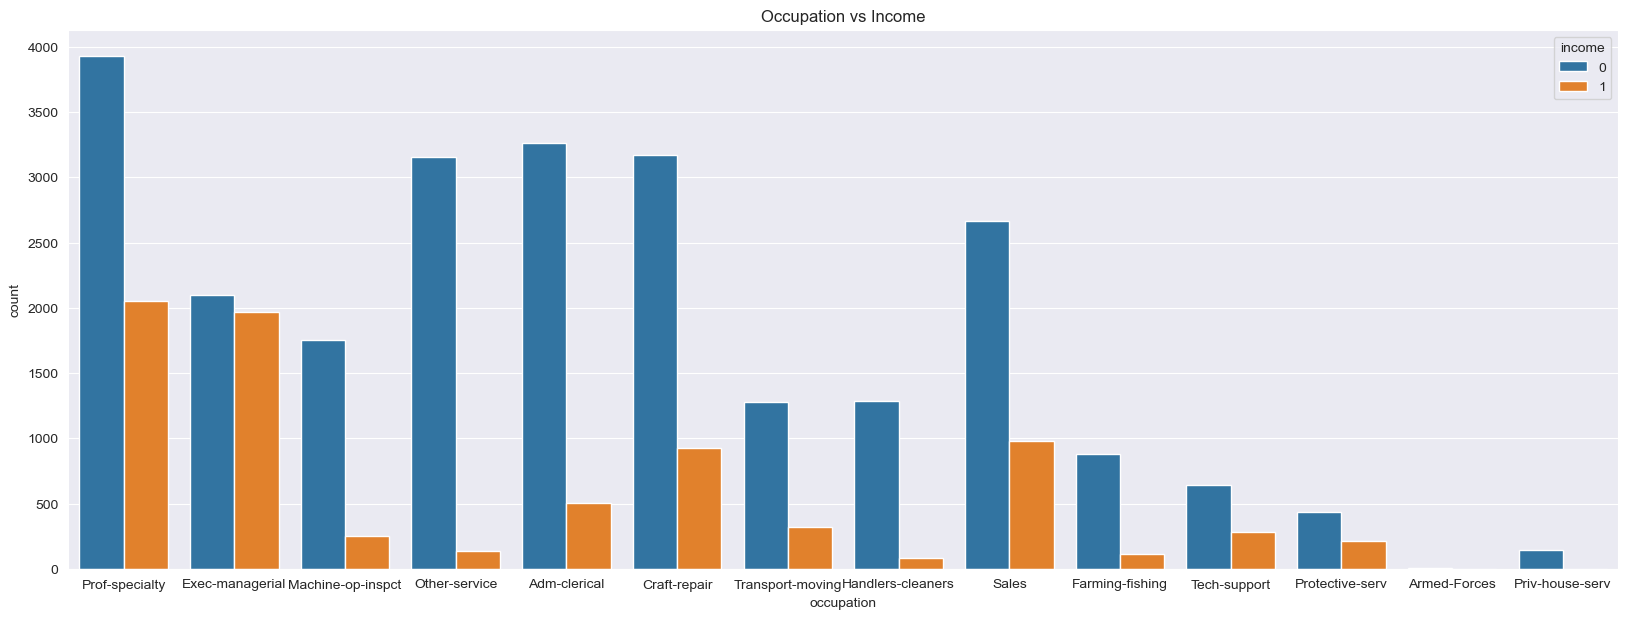

In [58]:
bi_variate_count_plot_exploration(frame=df, y='income', x='occupation')

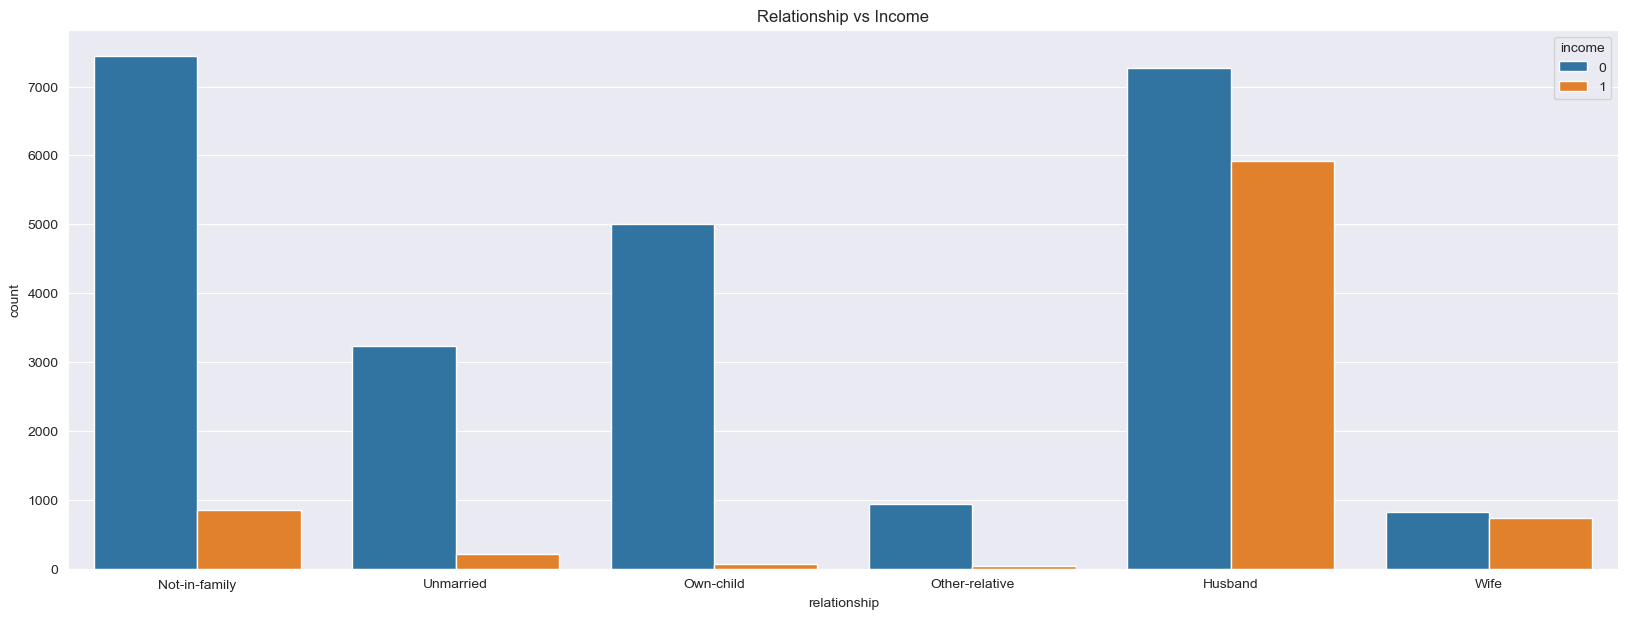

In [59]:
bi_variate_count_plot_exploration(frame=df, y='income', x='relationship')


<Figure size 2000x700 with 0 Axes>

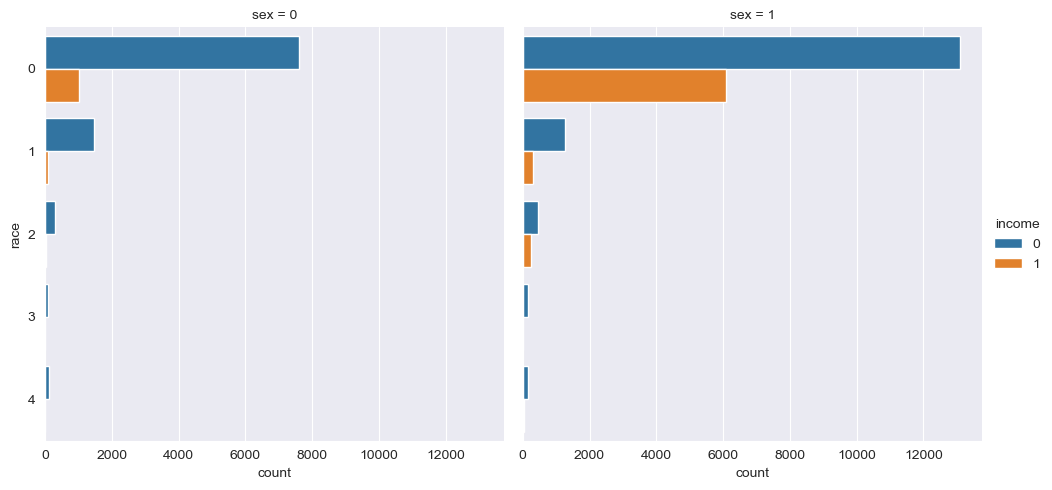

In [60]:
plt.figure(figsize=(20, 7))
sns.catplot(y="race", hue="income", kind="count", col="sex", data=df);

In [61]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,age,final_weight,education_num,race,sex,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076646,0.036527,-0.036219,0.088832,0.077674,0.057775,0.068756,0.234037
final_weight,-0.076646,1.000000,-0.043195,-0.010265,0.026858,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,-0.037536,0.012280,0.122630,0.079923,0.148123,0.335154
race,-0.036219,-0.010265,-0.037536,1.000000,-0.066823,-0.008580,-0.018148,-0.032226,-0.066876
sex,0.088832,0.026858,0.012280,-0.066823,1.000000,0.048480,0.045567,0.229309,0.215980
capital_gain,0.077674,0.000432,0.122630,-0.008580,0.048480,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.018148,0.045567,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,-0.032226,0.229309,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,-0.066876,0.215980,0.223329,0.150526,0.229689,1.000000


In [62]:
correlation_matrix[["income"]].sort_values('income', ascending=False)

,income
income,1.000000
education_num,0.335154
age,0.234037
hours_per_week,0.229689
capital_gain,0.223329
sex,0.215980
capital_loss,0.150526
final_weight,-0.009463
race,-0.066876


In [63]:
columns

Index(['age', 'work_class', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')